In [ ]:
# Arabic Tweets Emotion Recognition
# Team 15

In [2]:
!pip install chardet
!pip install wordcloud
!pip install arabic-reshaper
!pip install python-bidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import glob
import codecs

folder_path_neg = '/content/drive/MyDrive/Twitter/Negative'
folder_path_pos = '/content/drive/MyDrive/Twitter/Positive'

text_files_neg = {}
text_files_pos = {}

for file_path in glob.glob(os.path.join(folder_path_neg, '*.txt')):
    with open(file_path, 'r',encoding='UTF-8-SIG',errors='replace') as file:
        file_contents = file.read()
    text_files_neg[os.path.basename(file_path)] = file_contents

for file_path in glob.glob(os.path.join(folder_path_pos, '*.txt')):
    with open(file_path, 'r',encoding='UTF-8-SIG',errors='replace') as file:
        file_contents = file.read()
    text_files_pos[os.path.basename(file_path)] = file_contents


In [ ]:
print(text_files_neg[list(text_files_neg.keys())[1]])

هاض بعرفو بس مقرف



In [ ]:
print(text_files_pos[list(text_files_pos.keys())[2]])

صدقت يا أستاذ عمر



In [ ]:
import pandas as pd
import sys



num_records_pos = len(text_files_pos)
num_records_neg = len(text_files_neg)

record_size_pos = sys.getsizeof(text_files_pos)
record_size_neg = sys.getsizeof(text_files_neg)

data_volume_pos = num_records_pos * record_size_pos
data_volume_neg = num_records_neg * record_size_neg
data_volume_pos_mb = data_volume_pos / (1024 * 1024)
data_volume_neg_mb = data_volume_neg / (1024 * 1024)


print(f"The number of  records of the positive dataset is {num_records_pos} ")
print(f"The data volume of the positive dataset is {data_volume_pos_mb:.2f} MB")
print(f"The number of  records of the negative dataset is {num_records_neg} ")
print(f"The data volume of the negative dataset is {data_volume_neg_mb:.2f} MB")




The number of  records of the positive dataset is 1000 
The data volume of the positive dataset is 35.25 MB
The number of  records of the negative dataset is 1000 
The data volume of the negative dataset is 35.25 MB


In [5]:
pip install pyarabic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 7.1 MB/s eta 0:00:00


In [6]:
import pyarabic.araby as araby
from collections import Counter



def count_words(sentences_dict):
    all_sentences = " ".join(sentences_dict.values())
    words = araby.tokenize(all_sentences)
    word_freq = Counter(words)
    return sum(word_freq.values())


total_word_count_pos = count_words(text_files_pos)
total_word_count_neg = count_words(text_files_neg)

print(f"Total word count of positive tweets: {total_word_count_pos}")
print(f"Total word count of negative tweets: {total_word_count_neg}")


Total word count of positive tweets: 8675
Total word count of negative tweets: 11731


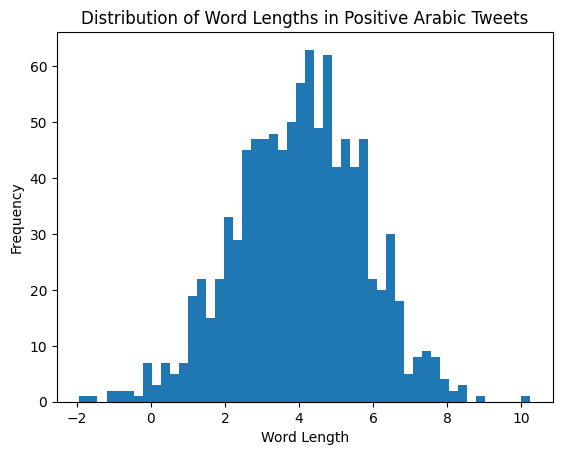

In [7]:
import numpy as np
import matplotlib.pyplot as plt


word_lengths = []
for sentence in text_files_pos.values():
    for word in sentence.split():
        word_lengths.append(len(word))


mean = np.mean(word_lengths)
std_dev = np.std(word_lengths)

dist = np.random.normal(mean, std_dev, 1000)


plt.hist(dist, bins=50)
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Word Lengths in Positive Arabic Tweets')
plt.show()

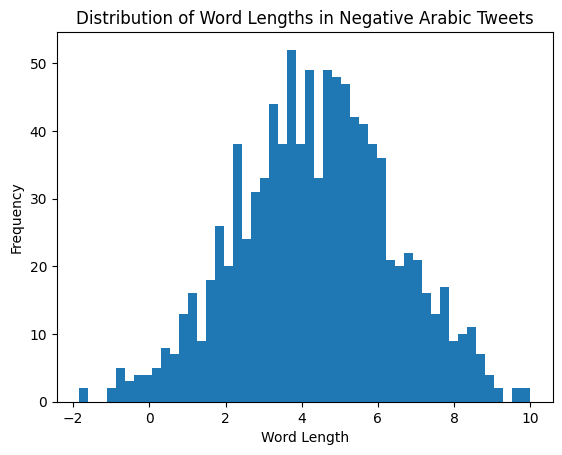

In [8]:
import numpy as np
import matplotlib.pyplot as plt


word_lengths = []
for sentence in text_files_neg.values():
    for word in sentence.split():
        word_lengths.append(len(word))


mean = np.mean(word_lengths)
std_dev = np.std(word_lengths)
dist = np.random.normal(mean, std_dev, 1000)

# Plot the distribution of word lengths
plt.hist(dist, bins=50)
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Word Lengths in Negative Arabic Tweets')
plt.show()

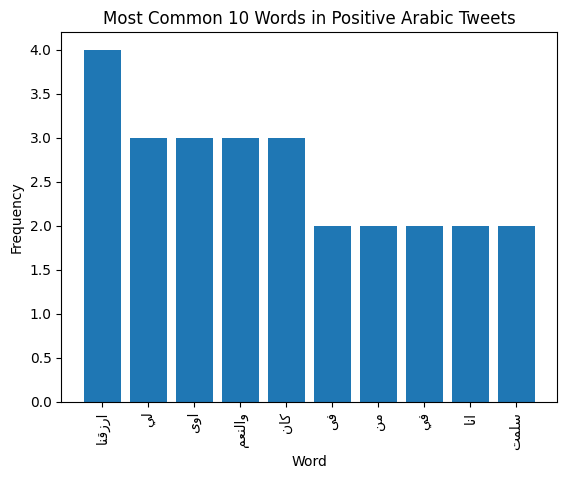

In [9]:
import pyarabic.araby as araby
import matplotlib.pyplot as plt
from collections import Counter
from arabic_reshaper import reshape
from bidi.algorithm import get_display



def most_common_words(text, num_words):
    words = araby.tokenize(text)
    word_freq = Counter(words)
    most_common = word_freq.most_common(num_words)
    return most_common


num_words = 10
common_words = []
for sentence in text_files_pos.values():
    common_words += most_common_words(sentence, num_words)


word_freq = dict(common_words)
word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot a bar chart of the most common words
plt.bar(range(len(word_freq)), list(word_freq.values()), align='center')
plt.xticks(range(len(word_freq)), [get_display(reshape(word)) for word in word_freq.keys()], rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title(f'Most Common {num_words} Words in Positive Arabic Tweets')
plt.show()


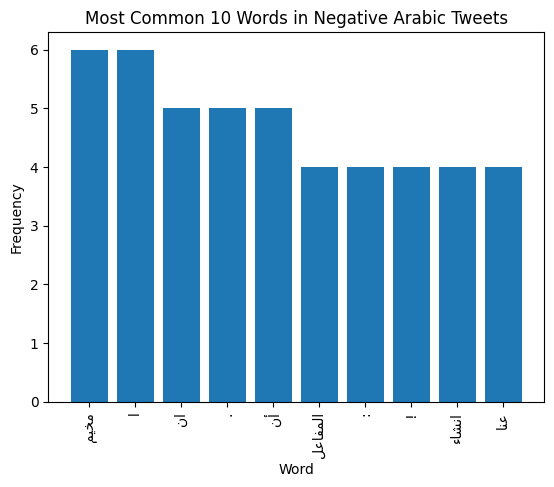

In [10]:
import pyarabic.araby as araby
import matplotlib.pyplot as plt
from collections import Counter
from arabic_reshaper import reshape
from bidi.algorithm import get_display


def most_common_words(text, num_words):
    words = araby.tokenize(text)
    word_freq = Counter(words)
    most_common = word_freq.most_common(num_words)

    return most_common


num_words = 10


common_words = []
for sentence in text_files_neg.values():
    common_words += most_common_words(sentence, num_words)


word_freq = dict(common_words)


word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot a bar chart of the most common words
plt.bar(range(len(word_freq)), list(word_freq.values()), align='center')
plt.xticks(range(len(word_freq)), [get_display(reshape(word)) for word in word_freq.keys()], rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title(f'Most Common {num_words} Words in Negative Arabic Tweets')
plt.show()


In [11]:
!pip install pyspellchecker
!pip install --upgrade pyspellchecker



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 57.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from spellchecker import SpellChecker
# from spellchecker.spellchecker import SpellChecker
from nltk.corpus import stopwords
import nltk
import pyarabic.araby as araby


spell = SpellChecker(language='ar')


nltk.download('stopwords')
stop_words = set(stopwords.words('arabic'))


def check_spelling(word):

    if spell.correction(word) == word:
        return True
    else:
        return False

def correct_spelling(word):
    if spell.correction(word) == word:
        return word
    else:
        corrections = spell.candidates(word)
        if corrections:
            return list(corrections)[0]
        else:
            return word


corrected_neg = {}


num_stop_words_removed = 0
num_misspelled_words_corrected = 0

for key, sentence in text_files_neg.items():
    words = sentence.split()
    num_stop_words = sum([1 for word in words if word in stop_words])
    num_stop_words_removed += num_stop_words
    corrected_words = [correct_spelling(word) if not araby.is_arabicrange(word) and not check_spelling(word) else word for word in words if word not in stop_words]
    num_misspelled_words = sum([1 for word in corrected_words if not araby.is_arabicrange(word) and not check_spelling(word)])
    num_misspelled_words_corrected += num_misspelled_words
    corrected_sentence = " ".join(corrected_words)
    corrected_neg[key] = corrected_sentence


print(f"Number of stop words removed from negative tweets: {num_stop_words_removed}")
print(f"Number of misspelled words corrected in negative tweets: {num_misspelled_words_corrected}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of stop words removed from negative tweets: 1944
Number of misspelled words corrected in negative tweets: 142


In [14]:
from spellchecker import SpellChecker
from nltk.corpus import stopwords
import nltk
import pyarabic.araby as araby


spell = SpellChecker(language='ar')


nltk.download('stopwords')
stop_words = set(stopwords.words('arabic'))


def check_spelling(word):
    if spell.correction(word) == word:
        return True
    else:
        return False

def correct_spelling(word):
    if spell.correction(word) == word:
        return word
    else:
        corrections = spell.candidates(word)
        if corrections:
            return list(corrections)[0]
        else:
            return word


corrected_pos = {}


num_stop_words_removed = 0
num_misspelled_words_corrected = 0

for key, sentence in text_files_pos.items():
    words = sentence.split()
    num_stop_words = sum([1 for word in words if word in stop_words])
    num_stop_words_removed += num_stop_words
    corrected_words = [correct_spelling(word) if not araby.is_arabicrange(word) and not check_spelling(word) else word for word in words if word not in stop_words]
    num_misspelled_words = sum([1 for word in corrected_words if not araby.is_arabicrange(word) and not check_spelling(word)])
    num_misspelled_words_corrected += num_misspelled_words
    corrected_sentence = " ".join(corrected_words)
    corrected_pos[key] = corrected_sentence


print(f"Number of stop words removed from positive tweets: {num_stop_words_removed}")
print(f"Number of misspelled words corrected in positive tweets: {num_misspelled_words_corrected}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of stop words removed from positive tweets: 1732
Number of misspelled words corrected in positive tweets: 26


In [15]:
import pandas as pd
import sys



num_records_pos = len(corrected_pos)
num_records_neg = len(corrected_neg)


record_size_pos = sys.getsizeof(corrected_pos)
record_size_neg = sys.getsizeof(corrected_neg)


data_volume_pos = num_records_pos * record_size_pos
data_volume_neg = num_records_neg * record_size_neg


data_volume_pos_mb = data_volume_pos / (1024 * 1024)
data_volume_neg_mb = data_volume_neg / (1024 * 1024)


print(f"The number of  records of the positive dataset after data cleaning is {num_records_pos} ")
print(f"The data volume of the positive dataset after data cleaning is {data_volume_pos_mb:.2f} MB")
print(f"The number of  records of the negative dataset after data cleaning is {num_records_neg} ")
print(f"The data volume of the negative dataset after data cleaning is {data_volume_neg_mb:.2f} MB")




The number of  records of the positive dataset after data cleaning is 1000 
The data volume of the positive dataset after data cleaning is 35.25 MB
The number of  records of the negative dataset after data cleaning is 1000 
The data volume of the negative dataset after data cleaning is 35.25 MB


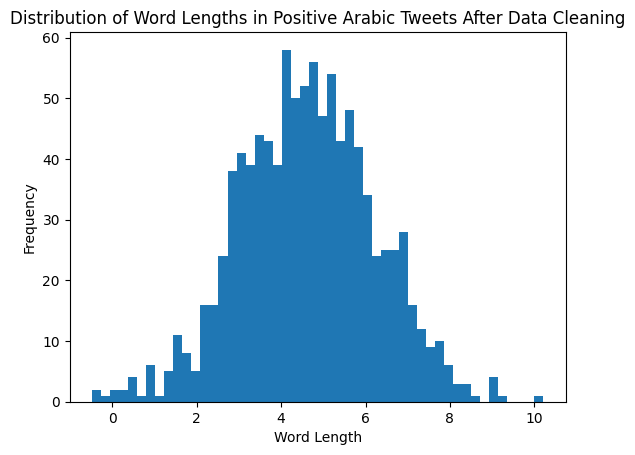

In [16]:
import numpy as np
import matplotlib.pyplot as plt


word_lengths = []
for sentence in corrected_pos.values():
    for word in sentence.split():
        word_lengths.append(len(word))


mean = np.mean(word_lengths)
std_dev = np.std(word_lengths)

dist = np.random.normal(mean, std_dev, 1000)


plt.hist(dist, bins=50)
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Word Lengths in Positive Arabic Tweets After Data Cleaning')
plt.show()

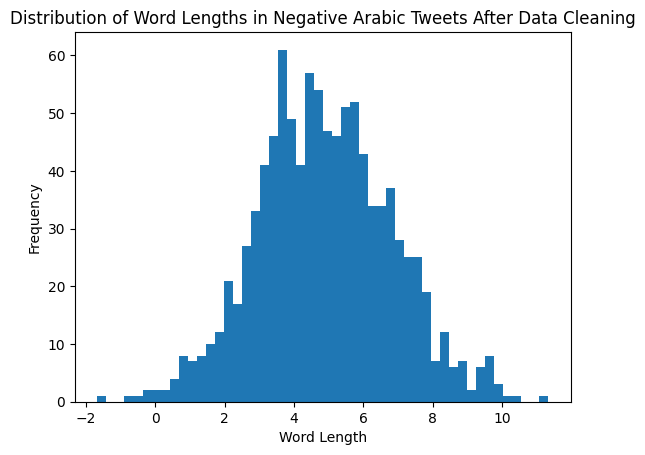

In [17]:
import numpy as np
import matplotlib.pyplot as plt


word_lengths = []
for sentence in corrected_neg.values():
    for word in sentence.split():
        word_lengths.append(len(word))


mean = np.mean(word_lengths)
std_dev = np.std(word_lengths)
dist = np.random.normal(mean, std_dev, 1000)

plt.hist(dist, bins=50)
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Word Lengths in Negative Arabic Tweets After Data Cleaning')
plt.show()

In [ ]:
print(text_files_pos[list(corrected_pos.keys())[2]])

صدقت يا أستاذ عمر



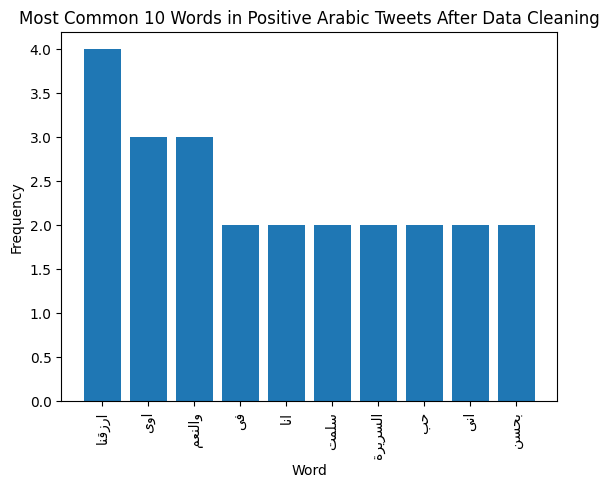

In [18]:
import pyarabic.araby as araby
import matplotlib.pyplot as plt
from collections import Counter
from arabic_reshaper import reshape
from bidi.algorithm import get_display



def most_common_words(text, num_words):
    words = araby.tokenize(text)
    word_freq = Counter(words)
    most_common = word_freq.most_common(num_words)
    return most_common


num_words = 10


common_words = []
for sentence in corrected_pos.values():
    common_words += most_common_words(sentence, num_words)


word_freq = dict(common_words)
word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot a bar chart of the most common words
plt.bar(range(len(word_freq)), list(word_freq.values()), align='center')
plt.xticks(range(len(word_freq)), [get_display(reshape(word)) for word in word_freq.keys()], rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title(f'Most Common {num_words} Words in Positive Arabic Tweets After Data Cleaning')
plt.show()


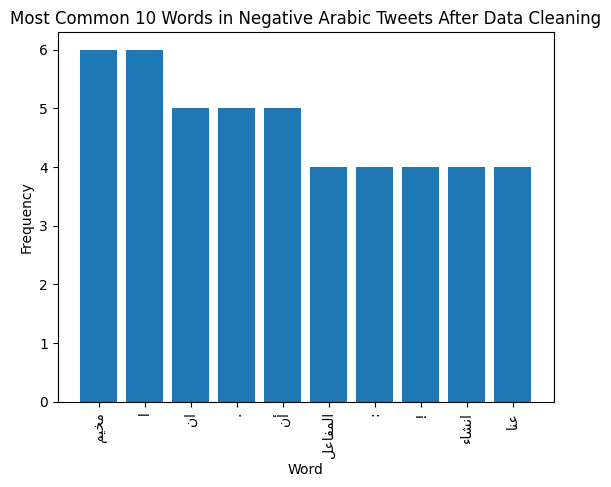

In [19]:
import pyarabic.araby as araby
import matplotlib.pyplot as plt
from collections import Counter
from arabic_reshaper import reshape
from bidi.algorithm import get_display



def most_common_words(text, num_words):
    words = araby.tokenize(text)
    word_freq = Counter(words)
    most_common = word_freq.most_common(num_words)
    return most_common

num_words = 10


common_words = []
for sentence in text_files_neg.values():
    common_words += most_common_words(sentence, num_words)

word_freq = dict(common_words)


word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot a bar chart of the most common words
plt.bar(range(len(word_freq)), list(word_freq.values()), align='center')
plt.xticks(range(len(word_freq)), [get_display(reshape(word)) for word in word_freq.keys()], rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title(f'Most Common {num_words} Words in Negative Arabic Tweets After Data Cleaning')
plt.show()


In [20]:
import pyarabic.araby as araby
from collections import Counter



def count_words(sentences_dict):
    all_sentences = " ".join(sentences_dict.values())
    words = araby.tokenize(all_sentences)
    word_freq = Counter(words)
    return sum(word_freq.values())

total_word_count_pos = count_words(corrected_pos)
total_word_count_neg = count_words(corrected_neg)

print(f"Total word count of positive tweets after data cleaning: {total_word_count_pos}")
print(f"Total word count of negative tweets after data cleaning: {total_word_count_neg}")


Total word count of positive tweets after data cleaning: 5932
Total word count of negative tweets after data cleaning: 8826


In [21]:

merged_dataset = {}
merged_dataset.update(text_files_pos)
merged_dataset.update(text_files_neg)

for label, text in merged_dataset.items():
    label = label[:8]
    print(label,text)

positive نعم فى البدايه كلهم اروع من الروعة

positive اسعد الله صباحكم علامتنا بالخيرات

positive صدقت يا أستاذ عمر

positive ما في أحلى من التفائل الواحد بعيش مرتاح

positive أجمل شيء مخافة الله تعالى

positive دعوة اخاك بظهر الغيب لا ترد

positive كل الاحترام

positive نعم

positive صباحك خير يا دكتور سلمان

positive قمة البلاغة

positive سننتصر على اعدائنا

positive اللهم قني شر نفسي

positive انا انصح كل انسان ان لايكذب لان الكذب مداه قصير

positive صباحك نور

positive الكلام في البدايه بكون حلو لاكن من يبقي خير

positive  الحل الوحيد هو القرب من الله وذكره  (الا بذكر الله تطمئن القلوب )قال الله تعالى

positive سلمت يداك روعة

positive صحيح الابتسامه لها تعابير كثيره

positive يسعد صباحك بذكر الرحمان

positive حينما ننجح فى الانتصار على انفسنا

positive المهم هو الصادق معي الناصح لي

positive جزاك الله خيرا

positive ربنا يكفينا هذا الشر

positive الحمد لله ع السلامه 

positive ربنا يشفيهم

positive عمل السريرة هو العمل الخالص لله اللهم ارزقنا عمل السريرة

positive الله يصبحك برضاه

In [22]:
from sklearn.model_selection import train_test_split


inputs = []
labels = []
for label, text in merged_dataset.items():
    label_new = label[:8]
    labels.append(label_new)
    inputs.append(text)


train_inputs, test_inputs, train_labels, test_labels = train_test_split(inputs, labels, test_size=0.2, random_state=42)


train_dataset = dict(zip(train_inputs, train_labels))
test_dataset = dict(zip(test_inputs, test_labels))


for text, label in train_dataset.items():
    print("Training:", text, label)

for text, label in test_dataset.items():
    print("Testing:", text, label)

Training: حلوه قوي يا د.عمرو و لو كل واحد تيقن من هذه القصه لن يوجد حاسد و لا ظالم و لا متواكل اللهم ارزقنا رزقا حلال طيبا اللهم آمين
 positive
Training: يا رب نستغفرك ونتوب اليك
 positive
Training: صباح الخير لك ياشيخ ... لكم كلماتك دائما تشعرني بالامان و السكينة و الرضي بما كتب الله 
 positive
Training: ونعم بالله من أختار قرب الله فما خاب ابدآآآآ الله على دى راحه وده شعور الحمد لل
 positive
Training: احلى اشي في الحياة الاستقرار مع زوج صالح
 positive
Training: الك يوم يا ظالم
 negative
Training:  تافهين جدا
 negative
Training: يا عمي ما في احلى من الاكبل
 positive
Training: انتم يا قطريه شن عارفكم السياسه انتم لاعندكم جيش ولا استراتجيه ثابته انتم عملاء امريكا يا خونه
 negative
Training:  بسعد ربك وصباحك عسل انت وكل من قال انا اردني وبحب القياده الهاشميه وتراب الاردن وسنح الاخوان ولاد كلب على هالصبح
 negative
Training: اللهم انى استغفرك واتوب اليك
 positive
Training: اللهم ارزقنا الصدق و الاخلاص
 positive
Training: انا مش مسؤول عن الحرامية يتفنجرو بمصاري البلد و انا اشحد
 negative
Tr

In [ ]:
!pip install torch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
tokenized_train = []
tokenized_test = []
tokenized_test_labels = []
tokenized_train_labels = []
for sentence in train_inputs:
    tokens = araby.tokenize(sentence)
    tokens = [token for token in tokens if not re.search(r"[\xa0\n\ufeff]", token)]
    tokenized_train.append(tokens)
for sentence in test_inputs:
    tokens = araby.tokenize(sentence)
    tokens = [token for token in tokens if not re.search(r"[\xa0\n\ufeff]", token)]
    tokenized_test.append(tokens)
for sentence in train_labels:
    tokens = araby.tokenize(sentence)
    tokens = [token for token in tokens if not re.search(r"[\xa0\n\ufeff]", token)]
    tokenized_train_labels.append(tokens)
for sentence in test_labels:
    tokens = araby.tokenize(sentence)
    tokens = [token for token in tokens if not re.search(r"[\xa0\n\ufeff]", token)]
    tokenized_test_labels.append(tokens)

for tokens in tokenized_train:
    print(tokens)


['حلوه', 'قوي', 'يا', 'د', '.', 'عمرو', 'و', 'لو', 'كل', 'واحد', 'تيقن', 'من', 'هذه', 'القصه', 'لن', 'يوجد', 'حاسد', 'و', 'لا', 'ظالم', 'و', 'لا', 'متواكل', 'اللهم', 'ارزقنا', 'رزقا', 'حلال', 'طيبا', 'اللهم', 'آمين']
['يا', 'رب', 'نستغفرك', 'ونتوب', 'اليك']
['صباح', 'الخير', 'لك', 'ياشيخ', '...', 'لكم', 'كلماتك', 'دائما', 'تشعرني', 'بالامان', 'و', 'السكينة', 'و', 'الرضي', 'بما', 'كتب', 'الله']
['ونعم', 'بالله', 'من', 'أختار', 'قرب', 'الله', 'فما', 'خاب', 'ابدآآآآ', 'الله', 'على', 'دى', 'راحه', 'وده', 'شعور', 'الحمد', 'لل']
['احلى', 'اشي', 'في', 'الحياة', 'الاستقرار', 'مع', 'زوج', 'صالح']
['الك', 'يوم', 'يا', 'ظالم']
['تافهين', 'جدا']
['يا', 'عمي', 'ما', 'في', 'احلى', 'من', 'الاكبل']
['انتم', 'يا', 'قطريه', 'شن', 'عارفكم', 'السياسه', 'انتم', 'لاعندكم', 'جيش', 'ولا', 'استراتجيه', 'ثابته', 'انتم', 'عملاء', 'امريكا', 'يا', 'خونه']
['بسعد', 'ربك', 'وصباحك', 'عسل', 'انت', 'وكل', 'من', 'قال', 'انا', 'اردني', 'وبحب', 'القياده', 'الهاشميه', 'وتراب', 'الاردن', 'وسنح', 'الاخوان', 'ولاد', 'كلب', '

In [ ]:
print(tokenized_train)

[['حلوه', 'قوي', 'يا', 'د', '.', 'عمرو', 'و', 'لو', 'كل', 'واحد', 'تيقن', 'من', 'هذه', 'القصه', 'لن', 'يوجد', 'حاسد', 'و', 'لا', 'ظالم', 'و', 'لا', 'متواكل', 'اللهم', 'ارزقنا', 'رزقا', 'حلال', 'طيبا', 'اللهم', 'آمين', ''], ['يا', 'رب', 'نستغفرك', 'ونتوب', 'اليك', ''], ['صباح', 'الخير', 'لك', 'ياشيخ', '...', 'لكم', 'كلماتك', 'دائما', 'تشعرني', 'بالامان', 'و', 'السكينة', 'و', 'الرضي', 'بما', 'كتب', 'الله', ''], ['ونعم', 'بالله', 'من', 'أختار', 'قرب', 'الله', 'فما', 'خاب', 'ابدآآآآ', 'الله', 'على', 'دى', 'راحه', 'وده', 'شعور', 'الحمد', 'لل', ''], ['احلى', 'اشي', 'في', 'الحياة', 'الاستقرار', 'مع', 'زوج', 'صالح', ''], ['الك', 'يوم', 'يا', 'ظالم', ''], ['تافهين', 'جدا', ''], ['يا', 'عمي', 'ما', 'في', 'احلى', 'من', 'الاكبل', ''], ['انتم', 'يا', 'قطريه', 'شن', 'عارفكم', 'السياسه', 'انتم', 'لاعندكم', 'جيش', 'ولا', 'استراتجيه', 'ثابته', 'انتم', 'عملاء', 'امريكا', 'يا', 'خونه', ''], ['', 'بسعد', 'ربك', 'وصباحك', 'عسل', 'انت', 'وكل', 'من', 'قال', 'انا', 'اردني', 'وبحب', 'القياده', 'الهاشميه', 'وتر

In [ ]:
!pip install torchtext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow
!pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade tensorflow
!pip install keras==2.4.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.4.3 which is incompatible.


In [27]:
import numpy as np


vocab_train = {}
vocab_train_labels = {}
vocab_test = {}
vocab_test_labels = {}
encoded_sentences_train = []
encoded_sentences_test = []
encoded_sentences_train_labels = []
encoded_sentences_test_labels = []

# Numerical encoding
for sentence in tokenized_train:
    encoded_sentence = [vocab_train.setdefault(token, len(vocab_train)) for token in sentence]
    encoded_sentences_train.append(encoded_sentence)

for sentence in tokenized_test:
    encoded_sentence = [vocab_test.setdefault(token, len(vocab_test)) for token in sentence]
    encoded_sentences_test.append(encoded_sentence)

for sentence in tokenized_train_labels:
    encoded_sentence = [vocab_train_labels.setdefault(token, len(vocab_train_labels)) for token in sentence]
    encoded_sentences_train_labels.append(encoded_sentence)

for sentence in tokenized_test_labels:
    encoded_sentence = [vocab_test_labels.setdefault(token, len(vocab_test_labels)) for token in sentence]
    encoded_sentences_test_labels.append(encoded_sentence)


max_length_train = max(len(seq) for seq in encoded_sentences_train)
padded_sequences_train = np.zeros((len(encoded_sentences_train), max_length_train), dtype=int)
for i, seq in enumerate(encoded_sentences_train):
    padded_sequences_train[i, :len(seq)] = seq

max_length_test = max(len(seq) for seq in encoded_sentences_test)
padded_sequences_test = np.zeros((len(encoded_sentences_test), max_length_test), dtype=int)
for i, seq in enumerate(encoded_sentences_test):
    padded_sequences_test[i, :len(seq)] = seq

max_length_train_labels = max(len(seq) for seq in encoded_sentences_train_labels)
padded_sequences_train_labels = np.zeros((len(encoded_sentences_train_labels), max_length_train_labels), dtype=int)
for i, seq in enumerate(encoded_sentences_train_labels):
    padded_sequences_train_labels[i, :len(seq)] = seq

max_length_test_labels = max(len(seq) for seq in encoded_sentences_test_labels)
padded_sequences_test_labels = np.zeros((len(encoded_sentences_test_labels), max_length_test_labels), dtype=int)
for i, seq in enumerate(encoded_sentences_test_labels):
    padded_sequences_test_labels[i, :len(seq)] = seq


print(padded_sequences_train)
print(padded_sequences_test)
print(padded_sequences_train_labels)
print(padded_sequences_test_labels)


[[   0    1    2 ...    0    0    0]
 [   2   26   27 ...    0    0    0]
 [  30   31   32 ...    0    0    0]
 ...
 [  20 4836  246 ...    0    0    0]
 [6065 2238  123 ...    0    0    0]
 [4390  218  564 ...    0    0    0]]
[[   0    1    2 ...    0    0    0]
 [  40   41   42 ...    0    0    0]
 [  49   50   51 ...    0    0    0]
 ...
 [2048 2049 2050 ...    0    0    0]
 [  39 2054 2055 ...    0    0    0]
 [  39 2057 2058 ...    0    0    0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]
[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1

In [50]:
import numpy as np


# max_length = max(len(seq) for seq in padded_sequences_train)
max_length = 175


vectorized_sequences_train = []
for seq in padded_sequences_train:
    padded_seq = np.pad(seq, (0, max_length - len(seq)), 'constant')  # Pad with zeros
    vectorized_sequences_train.append(padded_seq)


vectorized_sequences_train = np.array(vectorized_sequences_train)


print(vectorized_sequences_train)
print(vectorized_sequences_train.shape)


[[   0    1    2 ...    0    0    0]
 [   2   26   27 ...    0    0    0]
 [  30   31   32 ...    0    0    0]
 ...
 [  20 4836  246 ...    0    0    0]
 [6065 2238  123 ...    0    0    0]
 [4390  218  564 ...    0    0    0]]
(1600, 175)


In [ ]:
print(vectorized_sequences_train)

[[   0    1    2 ...    0    0    0]
 [   2   27   28 ...    0    0    0]
 [  31   32   33 ...    0    0    0]
 ...
 [  20 4857  250 ...    0    0    0]
 [6091 2247  124 ...    0    0    0]
 [4410  222  568 ...    0    0    0]]


In [51]:
import numpy as np

# Determine the maximum sequence length
max_length = max(len(seq) for seq in padded_sequences_test)
print(max_length)
# max_length = 145

# Pad the sequences
vectorized_sequences_test = []
for seq in padded_sequences_test:
    padded_seq = np.pad(seq, (0, max_length - len(seq)), 'constant')  # Pad with zeros
    vectorized_sequences_test.append(padded_seq)

# Convert to NumPy array
vectorized_sequences_test = np.array(vectorized_sequences_test)

# Print the vectorized sequences
print(vectorized_sequences_test)
print(vectorized_sequences_test.shape)


175
[[   0    1    2 ...    0    0    0]
 [  40   41   42 ...    0    0    0]
 [  49   50   51 ...    0    0    0]
 ...
 [2048 2049 2050 ...    0    0    0]
 [  39 2054 2055 ...    0    0    0]
 [  39 2057 2058 ...    0    0    0]]
(400, 175)


In [52]:
import numpy as np

# Determine the maximum sequence length
max_length = max(len(seq) for seq in padded_sequences_train_labels)

# Pad the sequences
vectorized_sequences_train_labels = []
for seq in padded_sequences_train_labels:
    padded_seq = np.pad(seq, (0, max_length - len(seq)), 'constant')  # Pad with zeros
    vectorized_sequences_train_labels.append(padded_seq)

# Convert to NumPy array
vectorized_sequences_train_labels = np.array(vectorized_sequences_train_labels)

# Print the vectorized sequences
print(vectorized_sequences_train_labels)


[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [53]:
import numpy as np

# Determine the maximum sequence length
max_length = max(len(seq) for seq in padded_sequences_test_labels)

# Pad the sequences
vectorized_sequences_test_labels = []
for seq in padded_sequences_test_labels:
    padded_seq = np.pad(seq, (0, max_length - len(seq)), 'constant')  # Pad with zeros
    vectorized_sequences_test_labels.append(padded_seq)

# Convert to NumPy array
vectorized_sequences_test_labels = np.array(vectorized_sequences_test_labels)

# Print the vectorized sequences
print(vectorized_sequences_test_labels)


[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]


In [32]:
!pip install tensorflow
!pip install numpy
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
print(vectorized_sequences_train)

[[   0    1    2 ...    0    0    0]
 [   2   26   27 ...    0    0    0]
 [  30   31   32 ...    0    0    0]
 ...
 [  20 4836  246 ...    0    0    0]
 [6065 2238  123 ...    0    0    0]
 [4390  218  564 ...    0    0    0]]


In [54]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

input_size = 1000
hidden_size = 64
num_layers = 1
output_size = 2

train_input = vectorized_sequences_train
train_labels = vectorized_sequences_train_labels
train_input = np.reshape(train_input, (train_input.shape[0], 1, -1))

model = Sequential()
model.add(LSTM(hidden_size, input_shape=(1, train_input.shape[2])))
model.add(Dense(output_size, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.fit(train_input, train_labels, batch_size=16, epochs=10)

test_input = vectorized_sequences_test
test_labels = vectorized_sequences_test_labels

print("Train input shape:", train_input.shape)
print("Train labels shape:", train_labels.shape)
print("Test input shape:", test_input.shape)
print("Test labels shape:", test_labels.shape)

test_input = np.reshape(test_input, (test_input.shape[0], 1, -1))

# Evaluation
loss = model.evaluate(test_input, test_labels)
print("Test loss:", loss)

predictions = model.predict(test_input)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = np.mean(predicted_labels == test_labels)
print("Accuracy:", accuracy)


Epoch 1/10
100/100 [==============================] - 2s 3ms/step - loss: 0.7166
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 0.6703
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 0.6615
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: 0.6499
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 0.6672
Epoch 6/10
100/100 [==============================] - 0s 3ms/step - loss: 0.6477
Epoch 7/10
100/100 [==============================] - 0s 3ms/step - loss: 0.6464
Epoch 8/10
100/100 [==============================] - 0s 3ms/step - loss: 0.6442
Epoch 9/10
100/100 [==============================] - 0s 3ms/step - loss: 0.6458
Epoch 10/10
100/100 [==============================] - 0s 3ms/step - loss: 0.6379
Train input shape: (1600, 1, 175)
Train labels shape: (1600, 1)
Test input shape: (400, 175)
Test labels shape: (400, 1)
13/13 [==============================] - 0s 3ms/step - loss: 0.8392


13/13 [==============================] - 0s 2ms/step


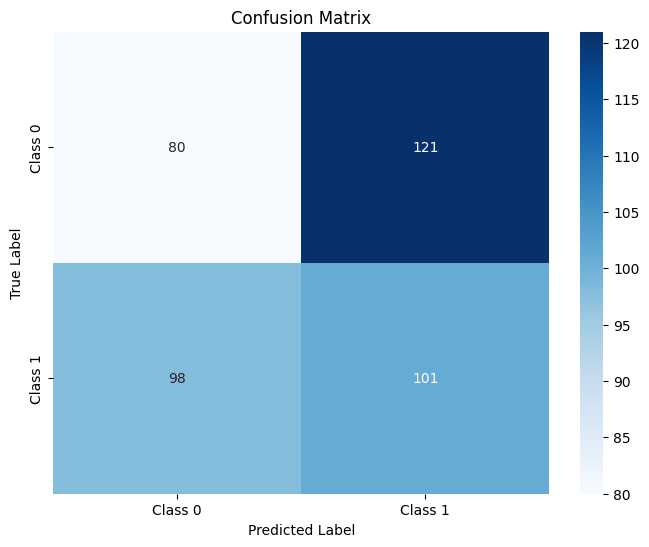

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predictions from the model
predictions = model.predict(test_input)
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Define class labels (modify according to your problem)
class_labels = ['Class 0', 'Class 1']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [60]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

input_size = 1000
hidden_size = 64
num_layers = 1
output_size = 2
batch_size = 8
epochs = 50
validation_split = 0.2

train_input = vectorized_sequences_train
train_labels = vectorized_sequences_train_labels
train_input = np.reshape(train_input, (train_input.shape[0], 1, -1))

model = Sequential()
model.add(LSTM(hidden_size, input_shape=(1, train_input.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(output_size, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.2, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(train_input, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_split=validation_split, callbacks=[reduce_lr, early_stop])

# Evaluate on test set
test_input = vectorized_sequences_test
test_labels = vectorized_sequences_test_labels
test_input = np.reshape(test_input, (test_input.shape[0], 1, -1))
loss, accuracy = model.evaluate(test_input, test_labels)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Make predictions
predictions = model.predict(test_input)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = np.mean(predicted_labels == test_labels)
print("Accuracy:", accuracy)


Epoch 1/50
160/160 [==============================] - 4s 12ms/step - loss: 0.7324 - accuracy: 0.5453 - val_loss: 0.7139 - val_accuracy: 0.5188 - lr: 0.0010
Epoch 2/50
160/160 [==============================] - 1s 7ms/step - loss: 0.7003 - accuracy: 0.5445 - val_loss: 0.7062 - val_accuracy: 0.5125 - lr: 0.0010
Epoch 3/50
160/160 [==============================] - 2s 10ms/step - loss: 0.6754 - accuracy: 0.5938 - val_loss: 0.7054 - val_accuracy: 0.5031 - lr: 0.0010
Epoch 4/50
160/160 [==============================] - 2s 11ms/step - loss: 0.6824 - accuracy: 0.5664 - val_loss: 0.6902 - val_accuracy: 0.5437 - lr: 0.0010
Epoch 5/50
160/160 [==============================] - 2s 12ms/step - loss: 0.6679 - accuracy: 0.5938 - val_loss: 0.6752 - val_accuracy: 0.5469 - lr: 0.0010
Epoch 6/50
160/160 [==============================] - 1s 9ms/step - loss: 0.6633 - accuracy: 0.6062 - val_loss: 0.6756 - val_accuracy: 0.5906 - lr: 0.0010
Epoch 7/50
160/160 [==============================] - 1s 8ms/step 

13/13 [==============================] - 0s 3ms/step


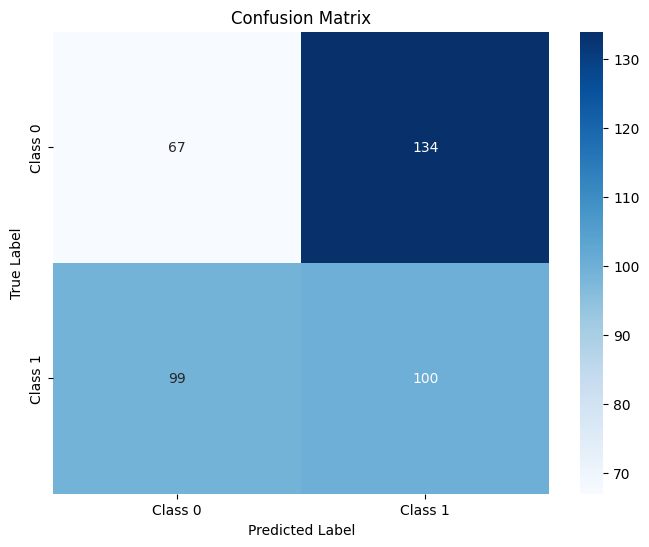

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predictions from the model
predictions = model.predict(test_input)
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Define class labels (modify according to your problem)
class_labels = ['Class 0', 'Class 1']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
